In [1]:
from sde import * 

{(0, 13): 0.8829580962848513, (0, 14): 0.9402968709107219, (1, 10): 0.6986893248424983, (3, 14): 0.1866367997668935, (4, 8): 0.8745562226431874, (4, 7): 0.15909394893187723, (5, 0): 0.42970910476614854, (5, 4): 0.05511597573435101, (6, 10): 0.9442054051425264, (6, 1): 0.0367573031961248, (6, 8): 0.1449462184726208, (7, 11): 0.0020601784267172407, (7, 13): 0.7474837240700668, (7, 10): 0.5148040135359576, (8, 7): 0.5528970643754609, (8, 10): 0.3835009630521343, (8, 13): 0.45532941039054353, (10, 0): 0.8719958441702031, (10, 12): 0.10309893688836469, (11, 9): 0.9639568482845216, (12, 1): 0.5004893291721312, (12, 14): 0.7527962033752468, (13, 2): 0.4133682783923035, (14, 2): 0.0527242035812745, (14, 12): 0.14554100304327366}


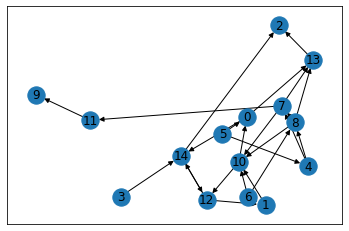

In [2]:
DG = makeDirectedGraph(15,27)

print(nx.get_edge_attributes(DG, 'weight'))
nx.draw_networkx(DG)

In [3]:
import operator

unsort_centDict = nx.degree_centrality(DG)    #get centrality values for each node in the graph 
centDict = dict(sorted(unsort_centDict.items(), key=operator.itemgetter(1),reverse=True))
print(centDict)

{10: 0.42857142857142855, 7: 0.3571428571428571, 8: 0.3571428571428571, 14: 0.3571428571428571, 0: 0.2857142857142857, 12: 0.2857142857142857, 13: 0.2857142857142857, 1: 0.21428571428571427, 4: 0.21428571428571427, 6: 0.21428571428571427, 2: 0.14285714285714285, 5: 0.14285714285714285, 11: 0.14285714285714285, 3: 0.07142857142857142, 9: 0.07142857142857142}


In [4]:
def getHighestCentralityNodes(dg):
    nx.degree_centrality(dg)   #returns dict with items {node:centrality}
    highest_cent_nodes = []   #initiate list for highest centrality nodes
    centMax = max(centDict.values())    #find highest centrality in the graph

    highest_cent_nodes = [key_node for key_node in centDict if (centDict.get(key_node) == centMax)]  #list of nodes with highest key node value
    
    #if there is a singular highest centrality node, then add the second highest node(s) to the list
    while (len(highest_cent_nodes) < 2): 
        centDict2 = {key:val for key, val in centDict.items() if val != centMax}
        centMax2 = max(centDict2.values())
        secHighestNodes = [key_node for key_node in centDict2 if (centDict2.get(key_node) == centMax2)]
        highest_cent_nodes += secHighestNodes
        
    return highest_cent_nodes

getHighestCentralityNodes(DG)

[10, 7, 8, 14]

In [5]:
import itertools

# split list of highest cent nodes into all possible subsets size 2
HCNchoose2 = list(itertools.combinations(getHighestCentralityNodes(DG), 2))
print(HCNchoose2)

[(10, 7), (10, 8), (10, 14), (7, 8), (7, 14), (8, 14)]


# Similiarity method: Jaccard Index

In [7]:
#calculate Jaccard Index for each pair of highest centrality nodes
for pair in HCNchoose2:
    a = pair[0]
    b = pair[1]
    Jindex = calculate_jaccard_similarity(DG, a, b)
    print(pair, Jindex)

NameError: name 'calculate_jaccard_similarity' is not defined

# Similarity method: Edit-distance

Edit-distance similarity implementation based only on a node's children.

In [ ]:
for pair in HCNchoose2:
    print(pair, get_immediate_similarity(DG, pair[0], pair[1]))
    print(find_most_immediate_similar(DG, pair[0]), ',', find_most_immediate_similar(DG, pair[1]))
    print()

In [ ]:
print(nx.descendants(DG, 1))

Edit-distance similarity implementation based only on a node's descendants.

In [ ]:
for pair in HCNchoose2:
    pair_it = []
    for id in range(len(pair)): 
        pair_it.append(pair[id])
    print(pair, get_full_similarity(DG, pair_it[0], pair_it[1]))
    print(find_most_similar(DG, pair_it[0]), ',', find_most_similar(DG, pair_it[1]))
    print()

# Similarity method: Edit-distance (Networkx)

In [ ]:
print(centralNodes)

In [ ]:
def get_childgraph(graph, source_node):
    source_node_childgraph = nx.DiGraph()
    source_node_childgraph.add_node(source_node)
    source_node_childgraph = find_node_children_subgraph(graph, source_node, source_node_childgraph)
    nx.draw_networkx(source_node_childgraph)

In [ ]:
cngraph1 = get_childgraph(DG, 'sidewalk wet')
cngraph1

# Similarity method: Simrank (Networkx)

In [ ]:
for pair in HCNchoose2: 
    simrank = nx.algorithms.similarity.simrank_similarity(DG, source=pair[0], target=pair[1])
    print(pair,  simrank)